In [24]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.style.use('default')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    'font.size': 20
})

In [25]:
data1step = jnp.load('../onestep/data.npy',allow_pickle = True).item()
data2step = jnp.load('../twostep/data.npy',allow_pickle = True).item()
dataPINNSR = jnp.load('../PINNSR/data.npy',allow_pickle = True).item()

In [26]:
# grids
tx_obs = data1step['tx_obs']
tx_all = data1step['tx_all']
tx_int = data1step['tx_int']
tx_bdy = data1step['tx_bdy']
tx_fine = data1step['tx_fine']
xfine = data1step['xfine']
# u vals at fine grid
u_true = data1step['u_true']
# u vals at fine grid at IC
u_true_IC = data1step['u_true_IC']
# u vals at fine grid at FC
u_true_FC = data1step['u_true_FC']
# new_u vals at fine grid
new_u_true = data1step['new_u_true']
# new_u vals at fine grid at IC
new_u_true_IC = data1step['new_u_true_IC']
# new_u vals at fine grid at FC
new_u_true_FC = data1step['new_u_true_FC']

# 1step preds
u_pred_1step = data1step['u_pred']
new_u_pred_1step = data1step['new_u_pred']
# 2step preds
u_pred_2step = data2step['u_pred']
new_u_pred_2step = data2step['new_u_pred']
# PINNSR preds
u_pred_PINNSR = dataPINNSR['u_pred']
new_u_pred_PINNSR = dataPINNSR['new_u_pred']

## Filtering 

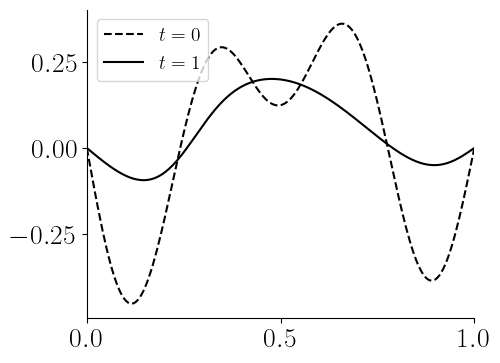

In [27]:
# u_true_1step IC and FC plot
plt.figure(figsize=(5,4))
# Plot IC
plt.plot(xfine, u_true_IC,
         color = 'black',
         linestyle = '--',
         label = r'$t=0$')
# Plot FC
plt.plot(xfine,u_true_FC,
         color = 'black',
         label = r'$t=1$')

# fig settings
plt.locator_params(axis="x", nbins=3)
plt.locator_params(axis="y", nbins=4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc="upper left",fontsize = 14)
plt.xlim(left=0.0, right = 1.0)
# plt.gca().set_xticklabels([])
#save fig
plt.savefig('onlydbry_u_ICFC.pdf', 
            bbox_inches='tight',
            format = 'pdf',
            dpi=300)

In [28]:
# vmin and vmax to use same colors
u_stacked = jnp.stack([u_true, 
                       u_pred_1step, 
                       u_pred_2step, 
                       u_pred_PINNSR])
vmin, vmax = jnp.min(u_stacked), jnp.max(u_stacked)

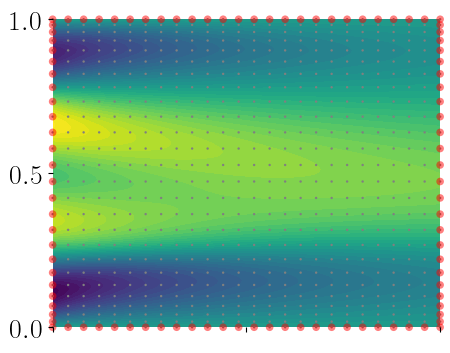

In [29]:
# u_true plot
plt.figure(figsize=(5,4))
plt.tricontourf(*tx_fine.T, u_true,
                levels= 50, 
                vmin=vmin, 
                vmax=vmax)
# coll grid
plt.scatter(*tx_all.T,
            c='gray',
            s = 3,
            clip_on =False, 
            edgecolors = 'none')
# obs grid
plt.scatter(*tx_obs.T,
            c='red', 
            s = 30, 
            alpha = 0.5,
            clip_on =False,
            edgecolors = 'none')

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
plt.gca().set_xticklabels([]) 

# save fig
plt.savefig('onlydbry_u_data.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

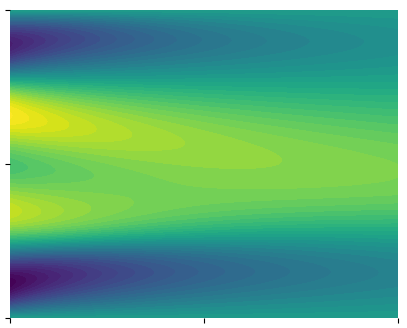

In [30]:
# u_pred_1step plot
plt.figure(figsize=(5,4))
plt.tricontourf(*tx_fine.T, u_pred_1step,
                levels= 50, 
                vmin=vmin, 
                vmax=vmax)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
plt.gca().set_xticklabels([]) 
plt.gca().set_yticklabels([])
plt.savefig('onlydbry_u_pred_1step.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

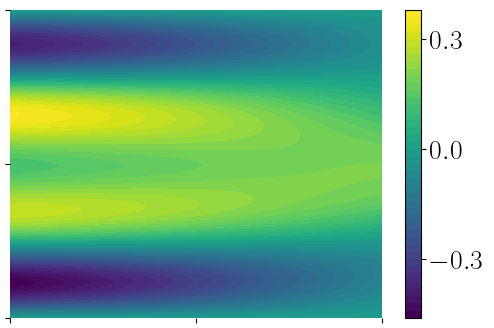

In [31]:
# u_pred_2step plot
plt.figure(figsize=(6,4))
cp = plt.tricontourf(*tx_fine.T, u_pred_2step,
                levels= 50, 
                vmin=vmin, 
                vmax=vmax)
cb = plt.colorbar(cp)
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()
# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
plt.gca().set_xticklabels([]) 
plt.gca().set_yticklabels([])
plt.savefig('onlydbry_u_pred_interp.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

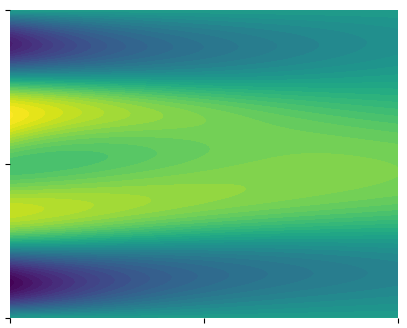

In [32]:
# u_pred_PINNSR plot
plt.figure(figsize=(5,4))
plt.tricontourf(*tx_fine.T, u_pred_PINNSR,
                levels= 50, 
                vmin=vmin, 
                vmax=vmax)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
plt.gca().set_xticklabels([]) 
plt.gca().set_yticklabels([])
plt.savefig('onlydbry_u_pred_PINNSR.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

### Errors

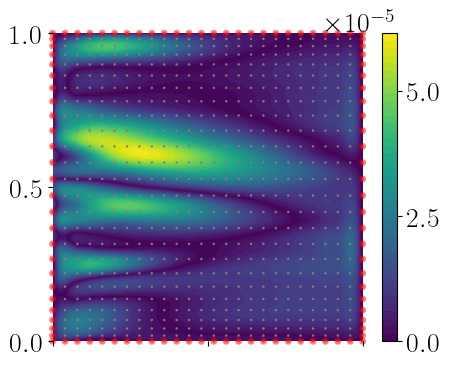

In [33]:
# u errors 1 step plot
plt.figure(figsize=(5,4))
cp = plt.tricontourf(*tx_fine.T, jnp.abs(u_true - u_pred_1step)/jnp.linalg.norm(u_true),
                levels= 50)
# coll grid
plt.scatter(*tx_all.T,
            c='gray',
            s = 3,
            clip_on =False, 
            edgecolors = 'none')
# obs grid
plt.scatter(*tx_obs.T,
            c='red', 
            s = 25, 
            alpha = 0.5,
            clip_on =False,
            edgecolors = 'none')

# colorbar
cb = plt.colorbar(cp)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()
plt.gca().set_xticklabels([]) 

# save fig
plt.savefig('onlydbry_u_error_1step.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

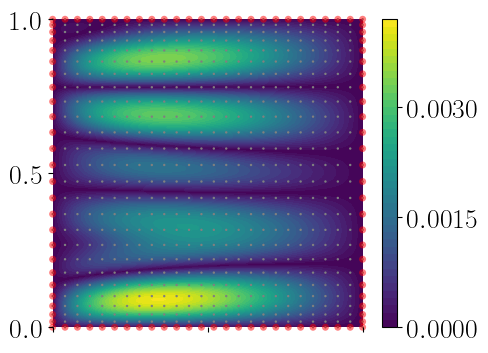

In [34]:
# u errors 2 step plot
plt.figure(figsize=(5,4))
cp = plt.tricontourf(*tx_fine.T, jnp.abs(u_true - u_pred_2step)/jnp.linalg.norm(u_true),
                levels= 50)
# coll grid
plt.scatter(*tx_all.T,
            c='gray',
            s = 3,
            clip_on =False, 
            edgecolors = 'none')
# obs grid
plt.scatter(*tx_obs.T,
            c='red', 
            s = 25, 
            alpha = 0.5,
            clip_on =False,
            edgecolors = 'none')

# colorbar
cb = plt.colorbar(cp)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()
plt.gca().set_xticklabels([]) 

# save fig
plt.savefig('onlydbry_u_error_interp.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

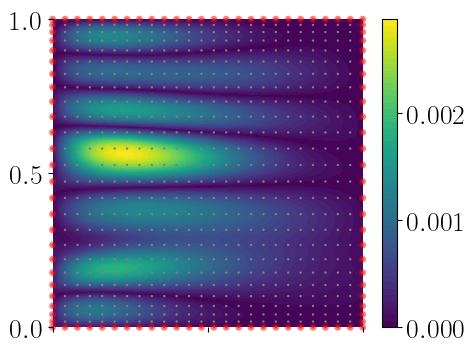

In [35]:
# u errors 2 step plot
plt.figure(figsize=(5,4))
cp = plt.tricontourf(*tx_fine.T, jnp.abs(u_true - u_pred_PINNSR)/jnp.linalg.norm(u_true),
                levels= 50)
# coll grid
plt.scatter(*tx_all.T,
            c='gray',
            s = 3,
            clip_on =False, 
            edgecolors = 'none')
# obs grid
plt.scatter(*tx_obs.T,
            c='red', 
            s = 25, 
            alpha = 0.5,
            clip_on =False,
            edgecolors = 'none')

# colorbar
cb = plt.colorbar(cp)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()
plt.gca().set_xticklabels([]) 

# save fig
plt.savefig('onlydbry_u_error_PINNSR.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

## Operator learning

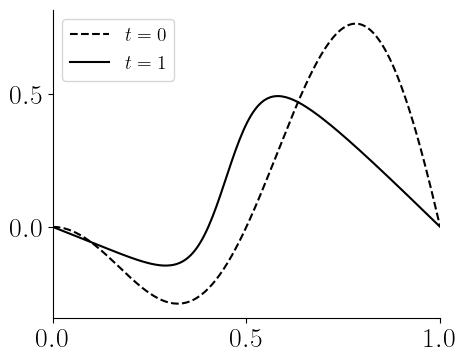

In [36]:
# new_u_true_1step IC and FC plot
plt.figure(figsize=(5,4))
# Plot IC
plt.plot(xfine, new_u_true_IC,
         color = 'black',
         linestyle = '--',
         label = r'$t=0$')
# Plot FC
plt.plot(xfine, new_u_true_FC,
         color = 'black',
         label = r'$t=1$')

# fig settings
plt.locator_params(axis="x", nbins=3)
plt.locator_params(axis="y", nbins=4)
plt.xlim(left = 0.0, right = 1.0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc="upper left",fontsize = 14)
# plt.gca().set_xticklabels([]) 
#save fig
plt.savefig('onlydbry_new_u_ICFC.pdf', 
            bbox_inches='tight',
            format = 'pdf',
            dpi=300)

In [37]:
# vmin and vmax to use same colors
new_u_stacked = jnp.stack([new_u_true, 
                           new_u_pred_1step, 
                           new_u_pred_2step, 
                           new_u_pred_PINNSR])
vmin, vmax = jnp.min(new_u_stacked), jnp.max(new_u_stacked)

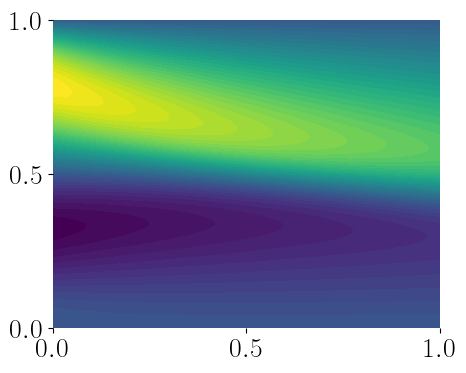

In [38]:
# new_u_true plot
plt.figure(figsize=(5,4))
plt.tricontourf(*tx_fine.T, new_u_true,
                levels= 50,
                vmin=vmin,
                vmax=vmax)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
plt.savefig('onlydbry_newIC_u_data.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

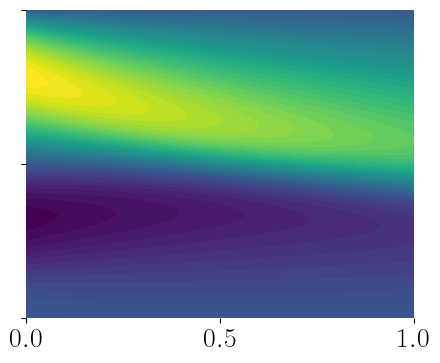

In [39]:
# new_u_pred_1step plot
plt.figure(figsize=(5,4))
plt.tricontourf(*tx_fine.T, new_u_pred_1step,
                levels= 50,
                vmin=vmin,
                vmax=vmax)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
plt.gca().set_yticklabels([]) 
plt.savefig('onlydbry_newIC_u_pred_1step.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

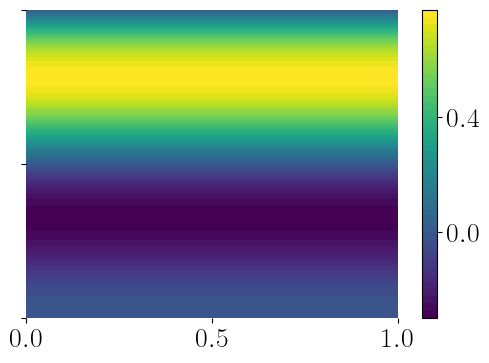

In [44]:
# new_u_pred_2step plot
plt.figure(figsize=(6,4))
cp = plt.tricontourf(*tx_fine.T, new_u_pred_2step,
                levels= 50,
                vmin=vmin,
                vmax=vmax)
cb = plt.colorbar(cp)
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
plt.gca().set_yticklabels([]) 
plt.savefig('onlydbry_newIC_u_pred_2step.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

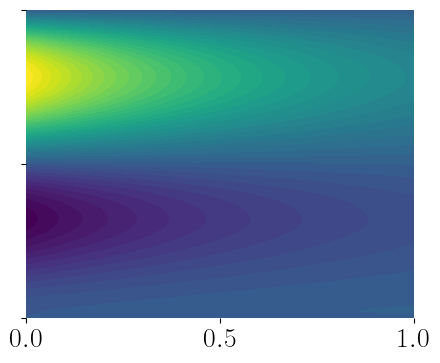

In [41]:
# new_u_pred_PINNSR plot
plt.figure(figsize=(5,4))
plt.tricontourf(*tx_fine.T, new_u_pred_PINNSR,
                levels= 50,
                vmin=vmin,
                vmax=vmax)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
plt.gca().set_yticklabels([]) 
plt.savefig('onlydbry_newIC_u_pred_PINNSR.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )


### Errors

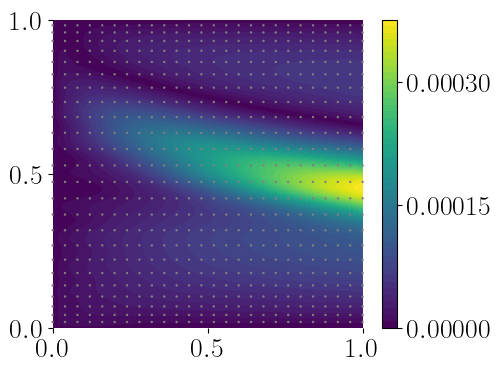

In [42]:
# new_u errors 1step plot
plt.figure(figsize=(5,4))
cp = plt.tricontourf(*tx_fine.T, jnp.abs(new_u_true - new_u_pred_1step)/jnp.linalg.norm(new_u_true),
                levels= 50)
# coll grid
plt.scatter(*tx_int.T,
            c='gray',
            s = 3,
            clip_on =False, 
            edgecolors = 'none')

# colorbar
cb = plt.colorbar(cp)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()

# save fig
plt.savefig('onlydbry_newIC_u_error_1step.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

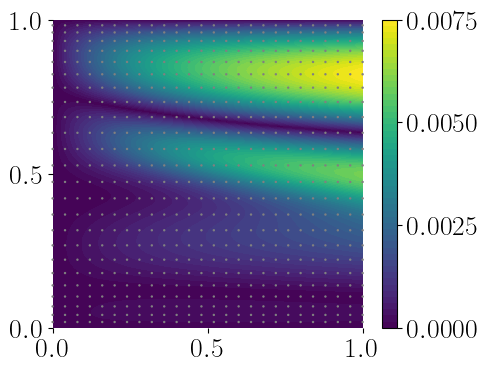

In [43]:
# new_u errors 2step plot
plt.figure(figsize=(5,4))
cp = plt.tricontourf(*tx_fine.T, jnp.abs(new_u_true - new_u_pred_2step)/jnp.linalg.norm(new_u_true),
                levels= 50)
# coll grid
plt.scatter(*tx_int.T,
            c='gray',
            s = 3,
            clip_on =False, 
            edgecolors = 'none')

# colorbar
cb = plt.colorbar(cp)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()

# save fig
plt.savefig('onlydbry_newIC_u_error_2step.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )